In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("cleaned_goodreads_books.csv")

df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,publication_month,publication_day
0,1,Harry Potter And The Half-Blood Prince (Harry ...,J.K. Rowling/Mary Grandprã©,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006.0,9.0,16.0
1,2,Harry Potter And The Order Of The Phoenix (Har...,J.K. Rowling/Mary Grandprã©,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004.0,9.0,1.0
2,4,Harry Potter And The Chamber Of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2003.0,11.0,1.0
3,5,Harry Potter And The Prisoner Of Azkaban (Harr...,J.K. Rowling/Mary Grandprã©,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004.0,5.0,1.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary Grandprã©,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004.0,9.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled From Eden: A William T. Vollmann Reader,William T. Vollmann/Larry Mccaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21,Da Capo Press,2004.0,12.0,21.0
11119,45633,You Bright And Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01,Penguin Books,1988.0,12.0,1.0
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01,Penguin Books,1993.0,8.0,1.0
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2007-02-27,Ecco,2007.0,2.0,27.0


## - **Task:** Perform exploratory data analysis to understand the distribution of book ratings, genres, and other key attributes.
### - **Requirements:**
## - **Ratings Analysis:** Plot the distribution of `average_rating` to understand the overall reception of books.

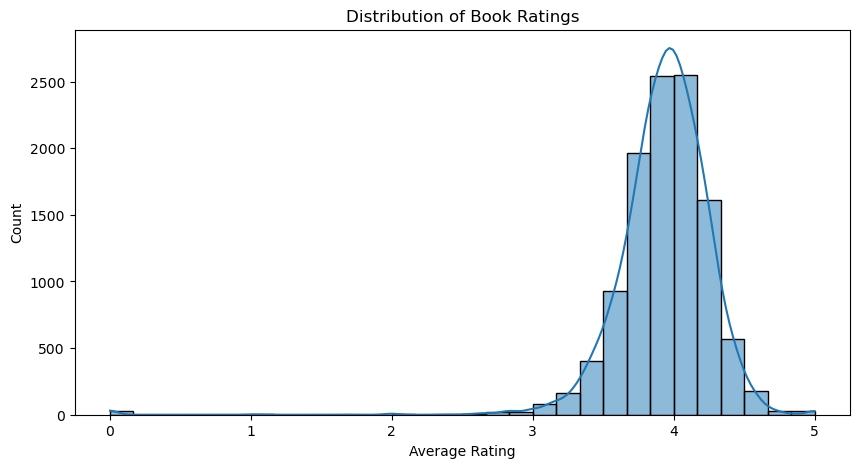

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()


### Popularity Analysis: Explore the ratings_count and text_reviews_count to determine which books are the most popular.

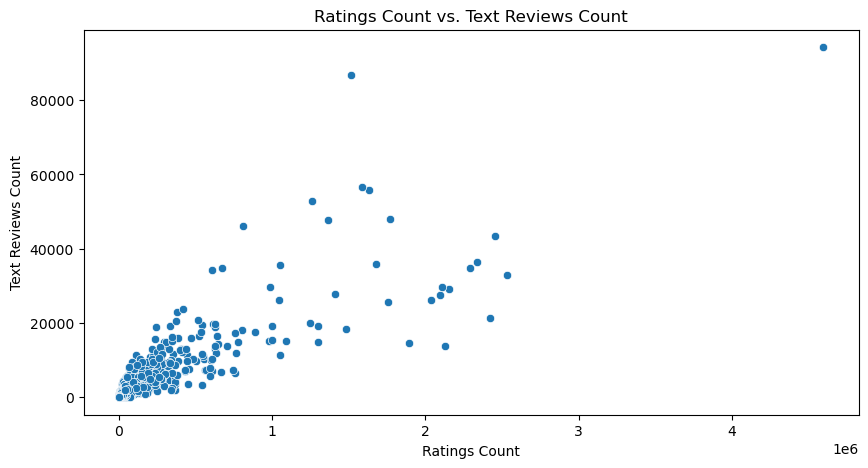

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['ratings_count'], y=df['text_reviews_count'])
plt.title("Ratings Count vs. Text Reviews Count")
plt.xlabel("Ratings Count")
plt.ylabel("Text Reviews Count")
plt.show()


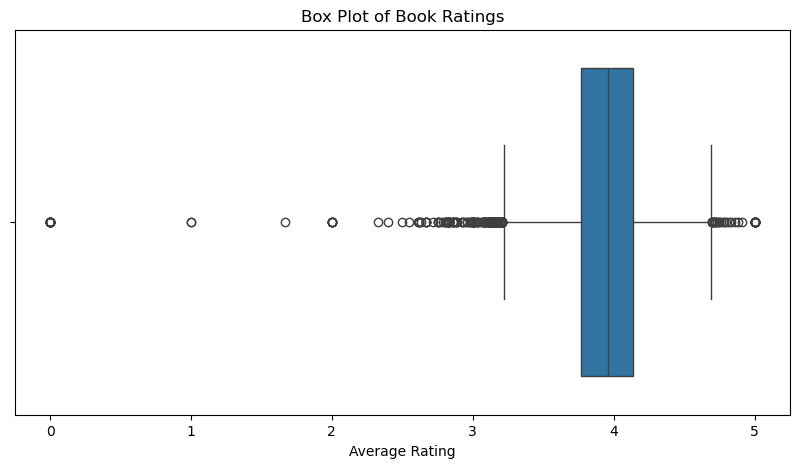

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['average_rating'])
plt.title("Box Plot of Book Ratings")
plt.xlabel("Average Rating")
plt.show()

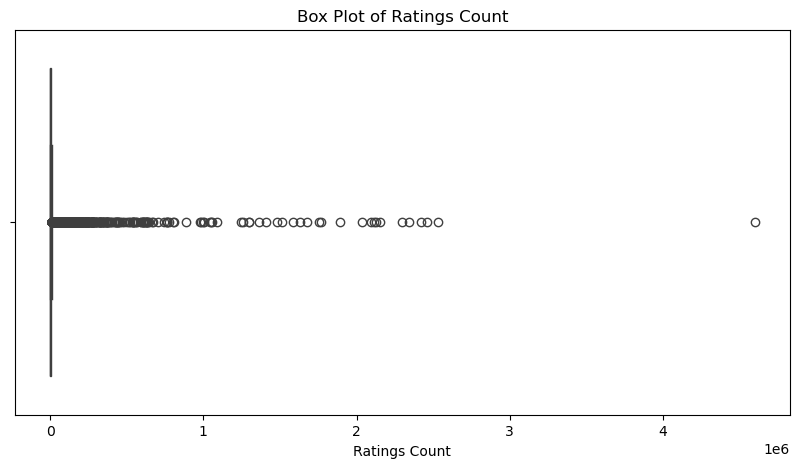

In [51]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ratings_count'])
plt.title("Box Plot of Ratings Count")
plt.xlabel("Ratings Count")
plt.show()

In [25]:
print("Top 10 Most Popular Books:\n", df.nlargest(10, 'ratings_count')[['title', 'ratings_count']])


Top 10 Most Popular Books:
                                                    title  ratings_count
10336                            Twilight (Twilight  #1)        4597666
1697                 The Hobbit  Or There And Back Again        2530894
1462                              The Catcher In The Rye        2457092
307                 Angels & Demons (Robert Langdon  #1)        2418736
3      Harry Potter And The Prisoner Of Azkaban (Harr...        2339585
4415   Harry Potter And The Chamber Of Secrets (Harry...        2293963
1      Harry Potter And The Order Of The Phoenix (Har...        2153167
23     The Fellowship Of The Ring (The Lord Of The Ri...        2128944
2114                                         Animal Farm        2111750
0      Harry Potter And The Half-Blood Prince (Harry ...        2095690


### Page Count Distribution: Investigate the distribution of num_pages and its correlation with average_rating.

## Page Count Distribution
### Objective: Investigate how the number of pages varies across books.

### Plot a histogram to see the distribution of num_pages.

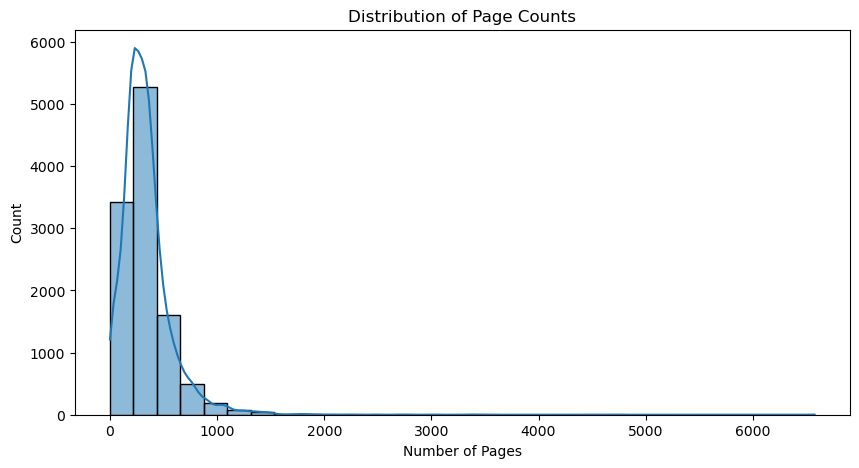

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(df['num_pages'], bins=30, kde=True)
plt.title("Distribution of Page Counts")
plt.xlabel("Number of Pages")
plt.ylabel("Count")
plt.show()


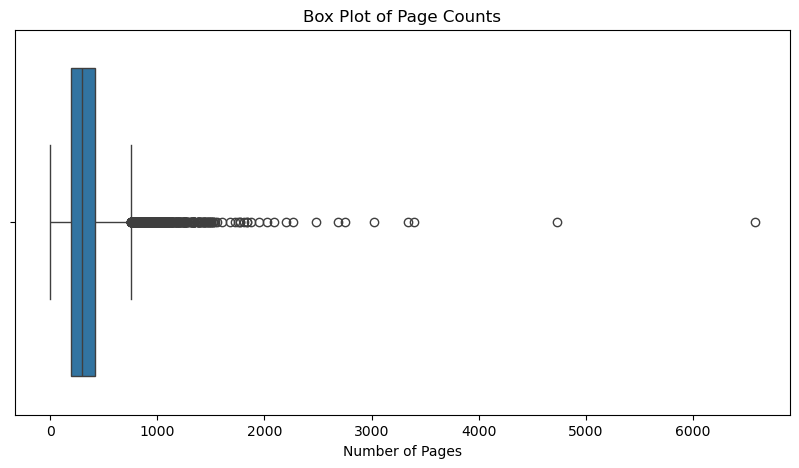

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['num_pages'])
plt.title("Box Plot of Page Counts")
plt.xlabel("Number of Pages")
plt.show()

### Scatter plot to check if num_pages affects average_rating.

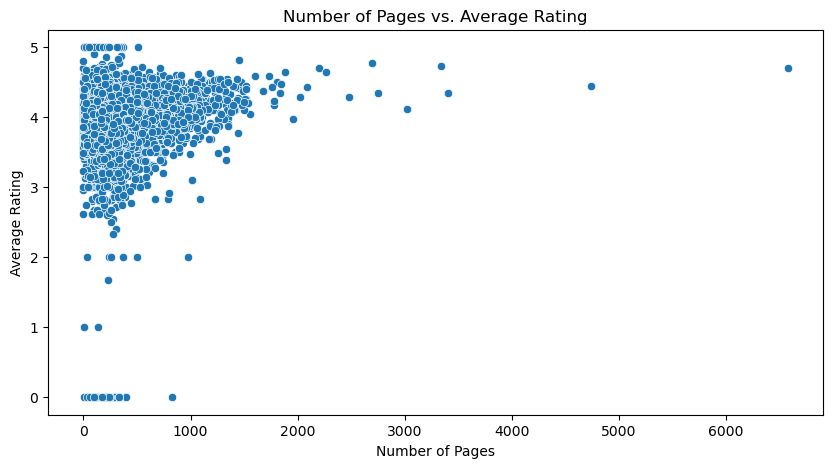

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['num_pages'], y=df['average_rating'])
plt.title("Number of Pages vs. Average Rating")
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.show()


### Publication Trends: Analyze the publication_date and identify trends over time, such as peak publishing years.

## Publication Trends
### Objective: Identify peak publishing years.

#### Extract publication year from publication_date.

In [40]:
# Convert publication_date to datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

# Now extract the year
df['publication_year'] = df['publication_date'].dt.year


In [42]:
print(df['publication_date'].dtype)


datetime64[ns]


In [44]:
df['publication_year'] = df['publication_date'].dt.year


## Plot the number of books published each year.

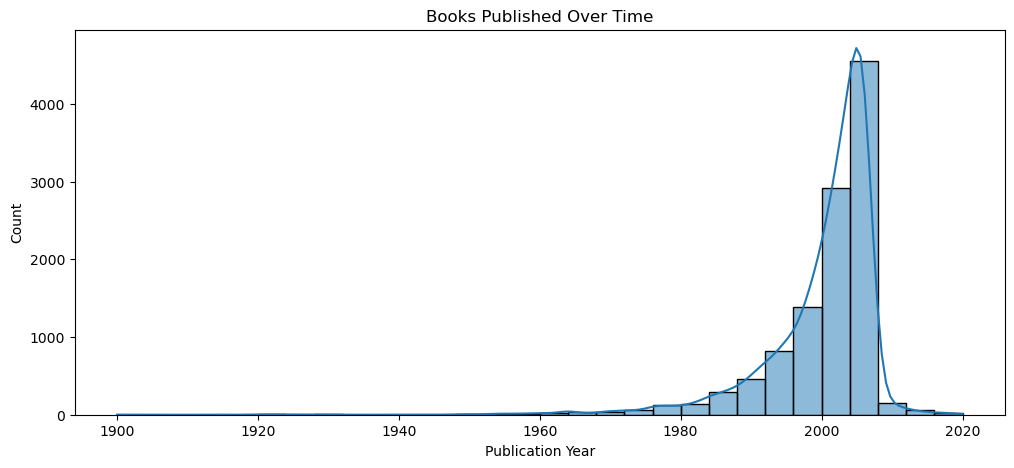

In [47]:
plt.figure(figsize=(12, 5))
sns.histplot(df['publication_year'].dropna(), bins=30, kde=True)
plt.title("Books Published Over Time")
plt.xlabel("Publication Year")
plt.ylabel("Count")
plt.show()


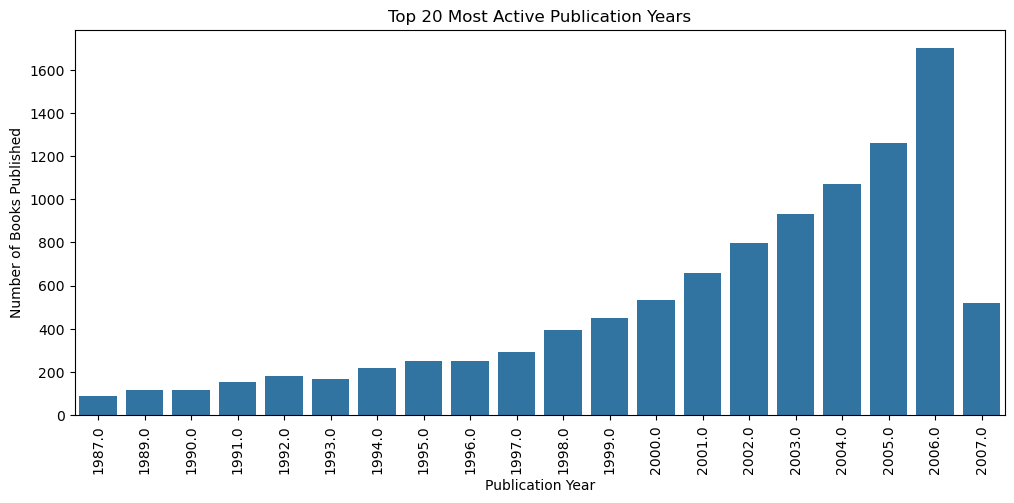

In [55]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['publication_year'].value_counts().index[:20],
            y=df['publication_year'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.title("Top 20 Most Active Publication Years")
plt.xlabel("Publication Year")
plt.ylabel("Number of Books Published")
plt.show()


## **Rating & Popularity Analysis:**

### - **Task:** Analyze the factors contributing to higher book ratings and popularity.
### - **Requirements:**
### - Explore how attributes like `num_pages`, `ratings_count`, and `publication_date` correlate with `average_rating`.

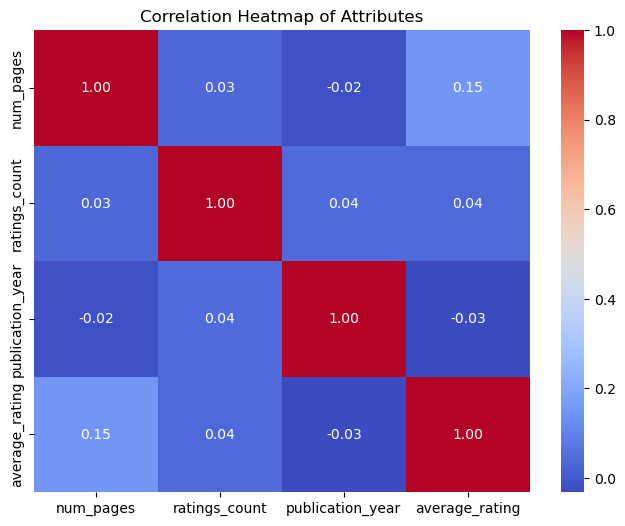

In [58]:
# Correlation between attributes and average rating
correlation_matrix = df[['num_pages', 'ratings_count', 'publication_year', 'average_rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Attributes")
plt.show()

In [67]:
# Compute correlation between ratings_count and average_rating
correlation_value = df['ratings_count'].corr(df['average_rating'])
print(f"Correlation between Ratings Count and Average Rating: {correlation_value:.2f}")
if correlation_value > 0:
    print("Books with more ratings tend to have higher average ratings.")
elif correlation_value < 0:
    print("Books with more ratings tend to have lower average ratings.")
else:
    print("No significant correlation between ratings count and average rating.")

Correlation between Ratings Count and Average Rating: 0.04
Books with more ratings tend to have higher average ratings.


### Identify which publishers tend to have higher-rated books.

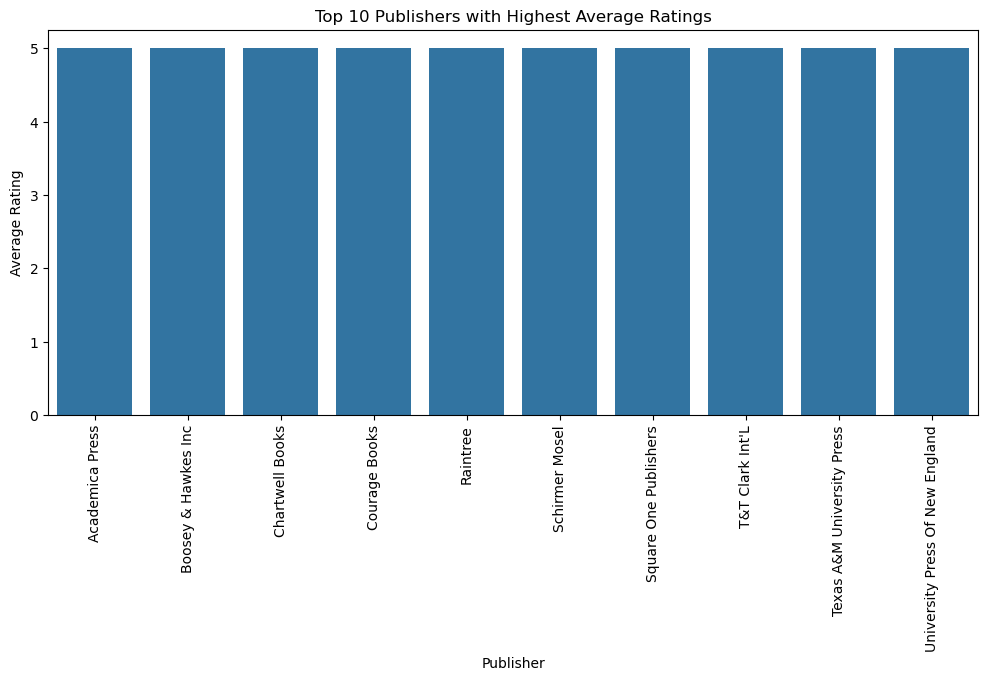

In [63]:
# Identify Publishers with Higher-Rated Books
top_publishers = df.groupby('publisher')['average_rating'].mean().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xticks(rotation=90)
plt.title("Top 10 Publishers with Highest Average Ratings")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.show()

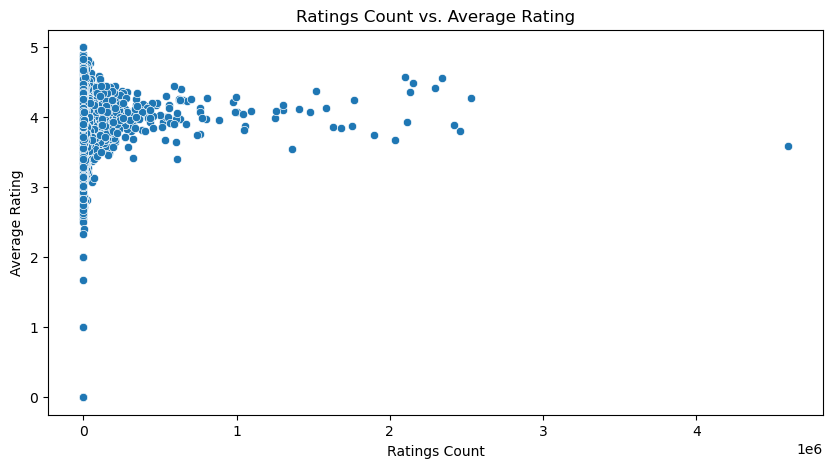

In [65]:
# Scatter plot of ratings_count vs. average_rating
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['ratings_count'], y=df['average_rating'])
plt.title("Ratings Count vs. Average Rating")
plt.xlabel("Ratings Count")
plt.ylabel("Average Rating")
plt.show()


### Create time-series visualizations to track these trends over the years.

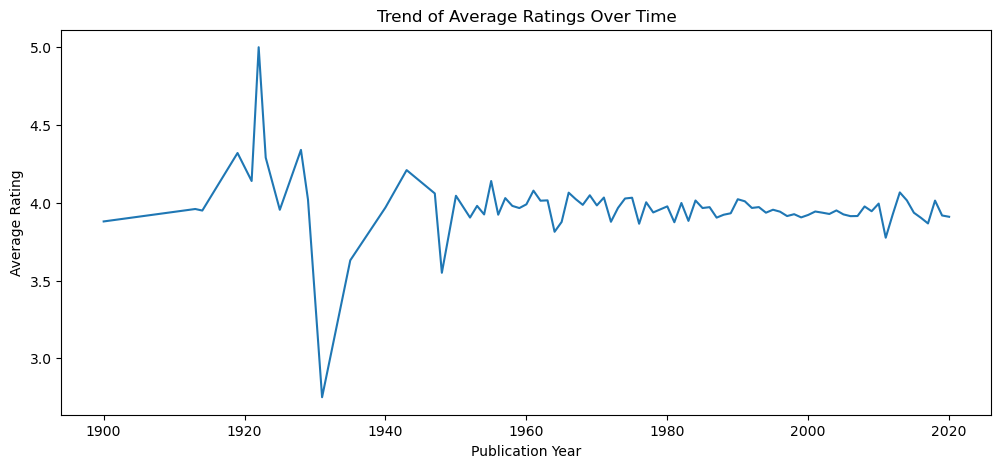

 This shows if books are getting higher or lower ratings over time.


In [72]:
plt.figure(figsize=(12, 5))
ratings_by_year = df.groupby('publication_year')['average_rating'].mean()
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values)
plt.title("Trend of Average Ratings Over Time")
plt.xlabel("Publication Year")
plt.ylabel("Average Rating")
plt.show()

print(" This shows if books are getting higher or lower ratings over time.")



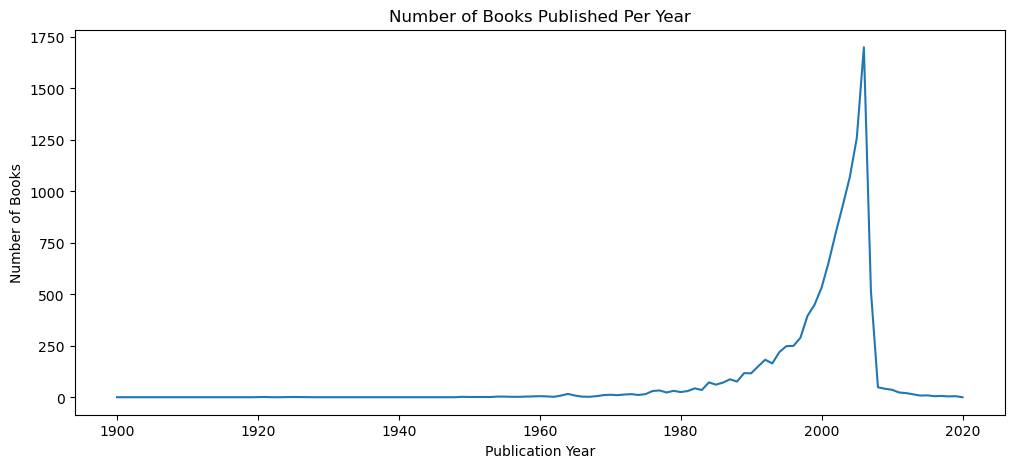

This tracks how the publishing industry has evolved over the years.


In [74]:
plt.figure(figsize=(12, 5))
books_per_year = df['publication_year'].value_counts().sort_index()
sns.lineplot(x=books_per_year.index, y=books_per_year.values)
plt.title("Number of Books Published Per Year")
plt.xlabel("Publication Year")
plt.ylabel("Number of Books")
plt.show()
print("This tracks how the publishing industry has evolved over the years.")

# **Author-Based and Publisher-Based Analysis:**

## - **Task:** Examine how different authors and publishers impact book ratings and popularity.
### - **Requirements:**
## - Identify top authors based on average ratings across their books.

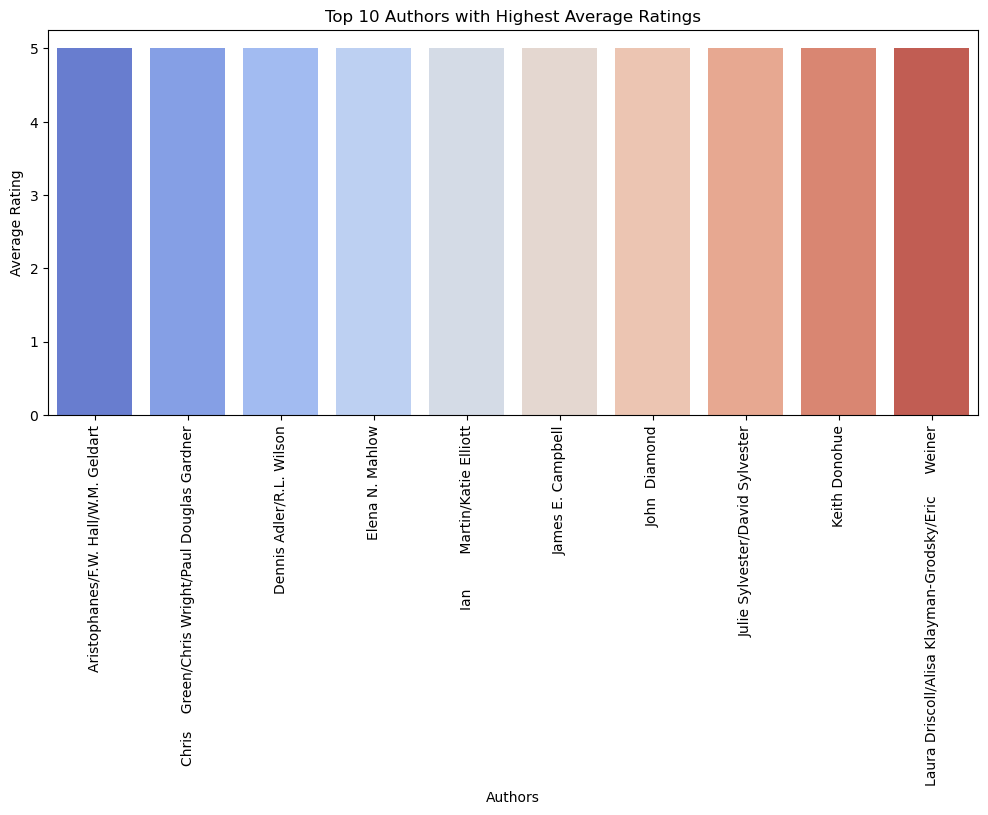

In [79]:
# Find top 10 authors with highest average ratings
top_authors = df.groupby('authors')['average_rating'].mean().nlargest(10)

# Visualize top authors by average rating
plt.figure(figsize=(12, 5))
sns.barplot(x=top_authors.index, y=top_authors.values,hue=top_authors.index, palette="coolwarm",legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 Authors with Highest Average Ratings")
plt.xlabel("Authors")
plt.ylabel("Average Rating")
plt.show()


## Compare books from different publishers and analyze if specific publishers have higher-rated books.

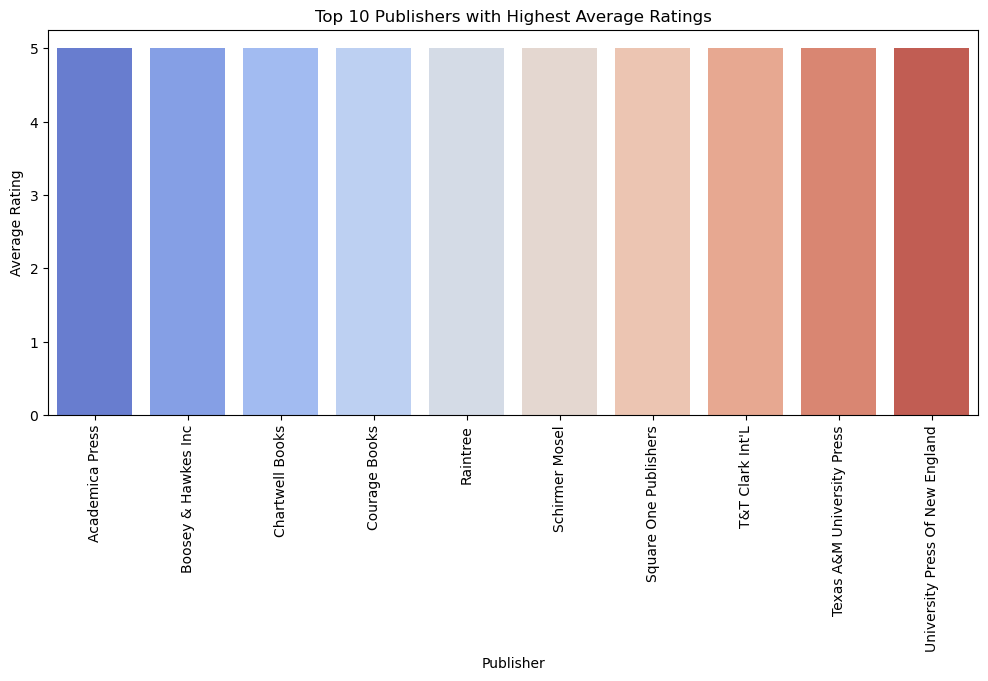

In [84]:
# Find top 10 publishers with highest-rated books
top_publishers = df.groupby('publisher')['average_rating'].mean().nlargest(10)

# Visualize top publishers by average rating
plt.figure(figsize=(12, 5))
sns.barplot(x=top_publishers.index, y=top_publishers.values,hue=top_publishers.index, palette="coolwarm",legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 Publishers with Highest Average Ratings")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.show()


### Visualize the distribution of average_rating for books by different authors and publishers using bar charts or box plots.

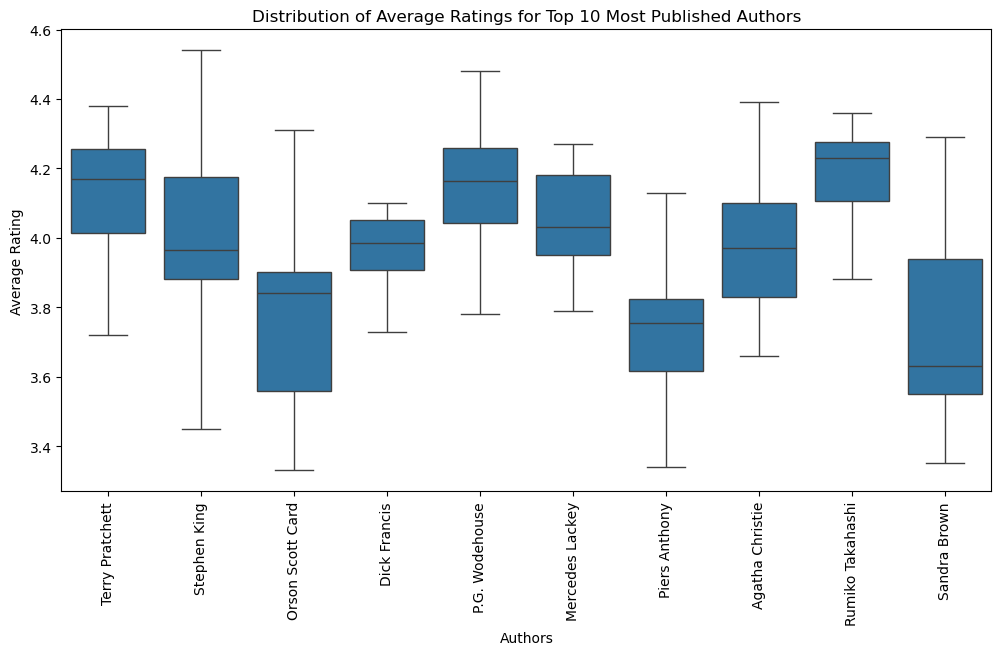

In [89]:
plt.figure(figsize=(12, 6))
top_authors_by_count = df['authors'].value_counts().index[:10]  # Select top 10 authors with most books
filtered_df = df[df['authors'].isin(top_authors_by_count)]  # Filter dataset

sns.boxplot(x='authors', y='average_rating', data=filtered_df, showfliers=False)
plt.xticks(rotation=90)
plt.title("Distribution of Average Ratings for Top 10 Most Published Authors")
plt.xlabel("Authors")
plt.ylabel("Average Rating")
plt.show()


### Investigate whether more books published by certain authors tend to have higher ratings or if ratings vary widely among authors.

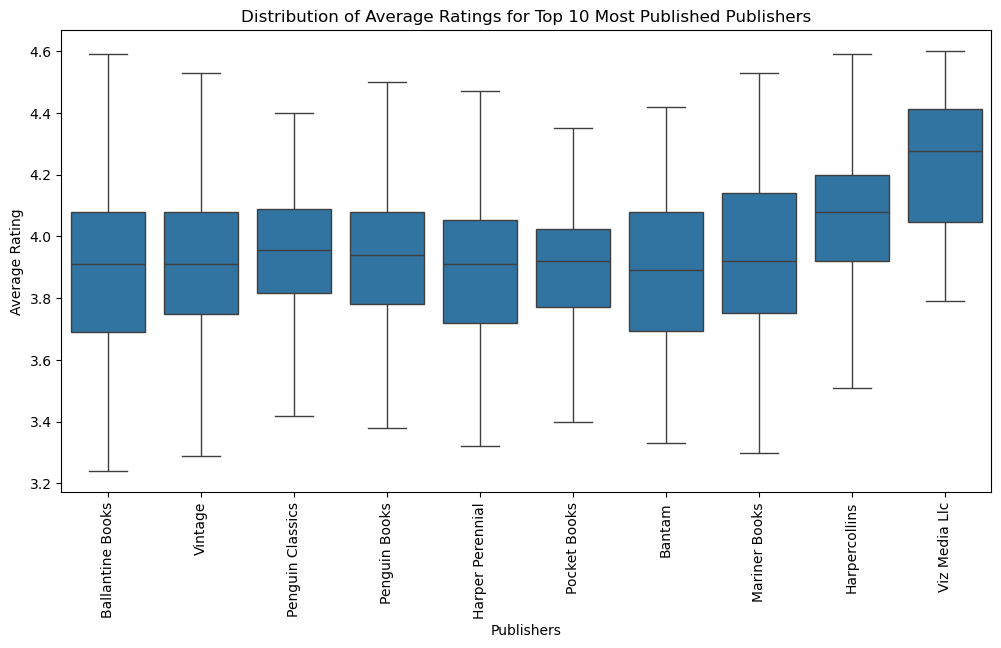

In [92]:
plt.figure(figsize=(12, 6))
top_publishers_by_count = df['publisher'].value_counts().index[:10]  # Select top 10 publishers with most books
filtered_df = df[df['publisher'].isin(top_publishers_by_count)]  # Filter dataset

sns.boxplot(x='publisher', y='average_rating', data=filtered_df, showfliers=False)
plt.xticks(rotation=90)
plt.title("Distribution of Average Ratings for Top 10 Most Published Publishers")
plt.xlabel("Publishers")
plt.ylabel("Average Rating")
plt.show()


## **Data Aggregation and Grouping:**

### - **Task:** Aggregate the data based on various factors like publication year, author, or publisher.
### - **Requirements:**
###  - Group books by `publication_date` (e.g., by decade or year) and calculate average `average_rating` and `ratings_count`.

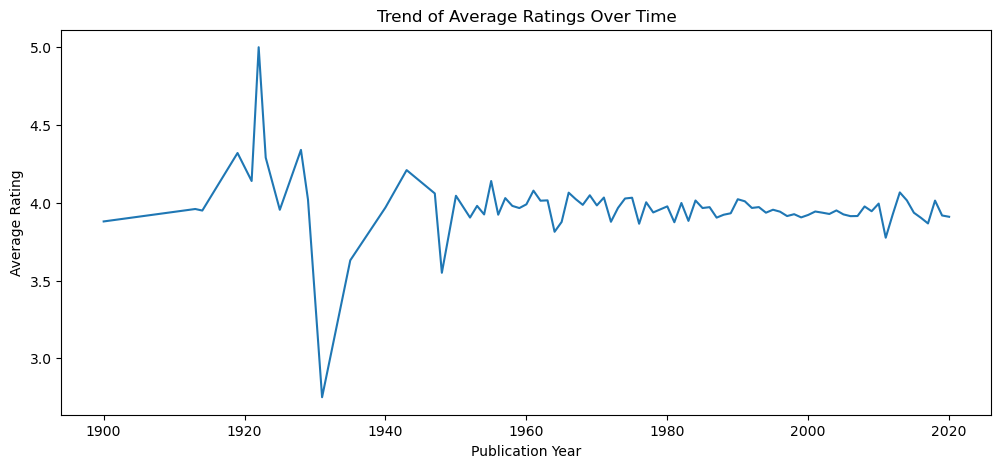

In [95]:
# Group by publication year and calculate average rating & total ratings count
yearly_stats = df.groupby('publication_year').agg({'average_rating': 'mean', 'ratings_count': 'sum'}).reset_index()

# Visualize the trend of average ratings over years
plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_stats['publication_year'], y=yearly_stats['average_rating'])
plt.title("Trend of Average Ratings Over Time")
plt.xlabel("Publication Year")
plt.ylabel("Average Rating")
plt.show()


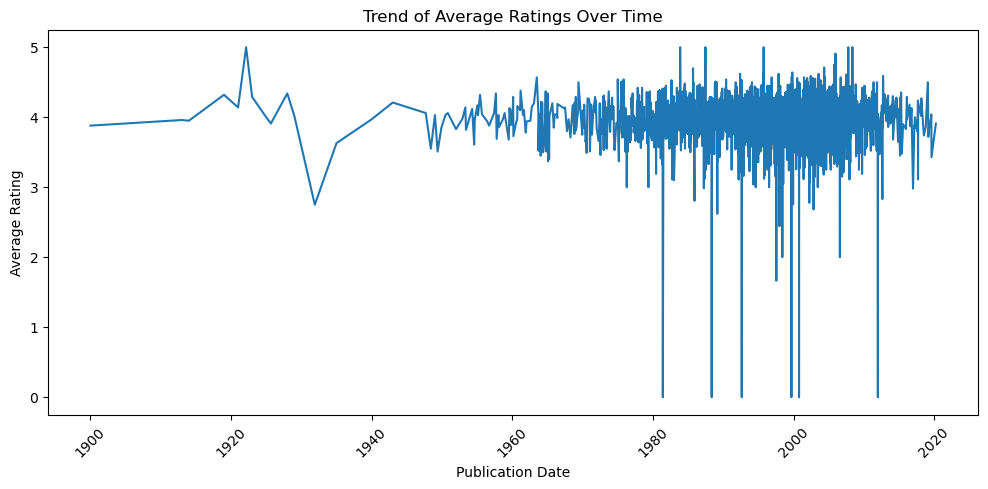

In [99]:
# Group by publication_date and calculate average rating & total ratings count
date_stats = df.groupby('publication_date').agg({'average_rating': 'mean', 'ratings_count': 'sum'}).reset_index()

# Visualize the trend of average ratings over time
plt.figure(figsize=(12, 5))
sns.lineplot(x=date_stats['publication_date'], y=date_stats['average_rating'])
plt.xticks(rotation=45)
plt.title("Trend of Average Ratings Over Time")
plt.xlabel("Publication Date")
plt.ylabel("Average Rating")
plt.show()


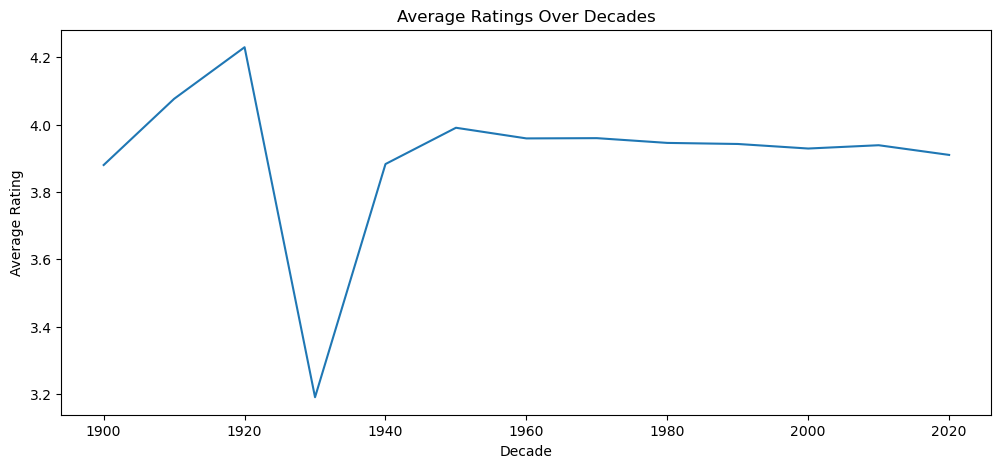

In [102]:
# Create a 'decade' column
df['decade'] = (df['publication_year'] // 10) * 10

# Group by decade and calculate average ratings & ratings count
decade_stats = df.groupby('decade').agg({'average_rating': 'mean', 'ratings_count': 'sum'}).reset_index()

# Visualize decade-wise trends
plt.figure(figsize=(12, 5))
sns.lineplot(x=decade_stats['decade'], y=decade_stats['average_rating'])
plt.title("Average Ratings Over Decades")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.show()


### Aggregate data by publisher or author and compare their average ratings.

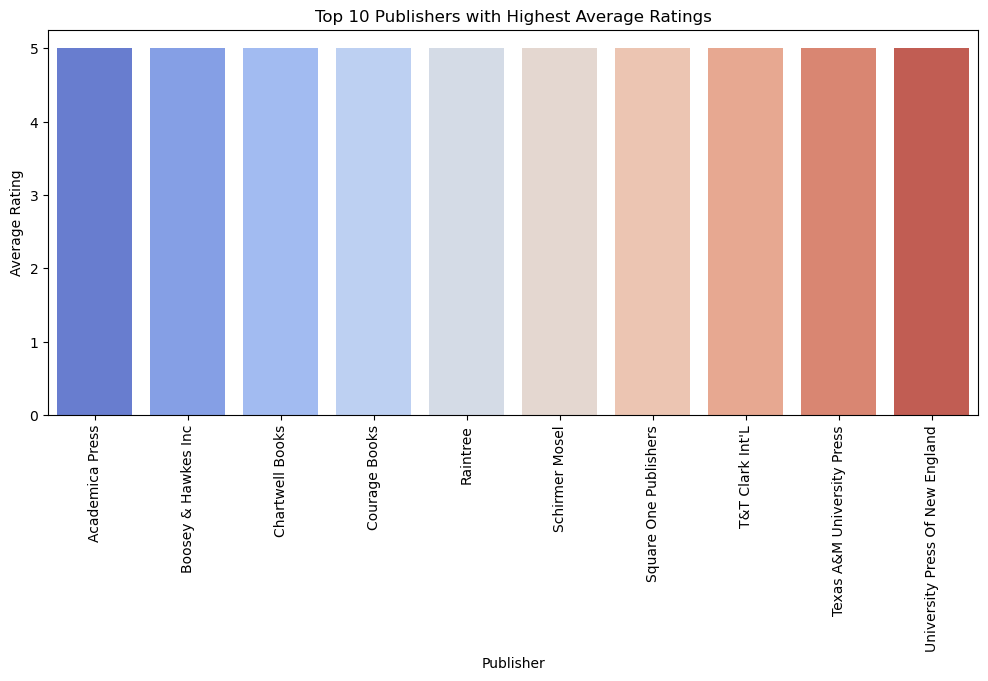

 This tells us which publishers consistently produce highly-rated books.


In [109]:
# Group by publisher and calculate average ratings & book count
publisher_stats = df.groupby('publisher').agg({'average_rating': 'mean', 'bookID': 'count'}).reset_index()

# Find the top 10 publishers with highest average ratings
top_publishers = publisher_stats.nlargest(10, 'average_rating')

# Visualize top publishers
plt.figure(figsize=(12, 5))
sns.barplot(x=top_publishers['publisher'], y=top_publishers['average_rating'],hue=top_publishers['publisher'], palette="coolwarm",legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 Publishers with Highest Average Ratings")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.show()

print(" This tells us which publishers consistently produce highly-rated books.")

### Use aggregation functions like mean, count, and median to uncover insights about trends in book popularity and quality

In [111]:
# Group by publication year and apply mean, count, and median
popularity_trends = df.groupby('publication_year').agg({
    'average_rating': ['mean', 'median'],
    'ratings_count': ['sum', 'median', 'count']
}).reset_index()

# Rename columns for better readability
popularity_trends.columns = ['publication_year', 'avg_rating', 'median_rating', 
                             'total_ratings', 'median_ratings', 'book_count']

# Display the first few rows
print(popularity_trends.head())



   publication_year  avg_rating  median_rating  total_ratings  median_ratings  \
0            1900.0        3.88           3.88            332           332.0   
1            1913.0        3.96           3.96            111           111.0   
2            1914.0        3.95           3.95             87            87.0   
3            1919.0        4.32           4.32            208           208.0   
4            1921.0        4.14           4.14             59            29.5   

   book_count  
0           1  
1           1  
2           1  
3           1  
4           2  


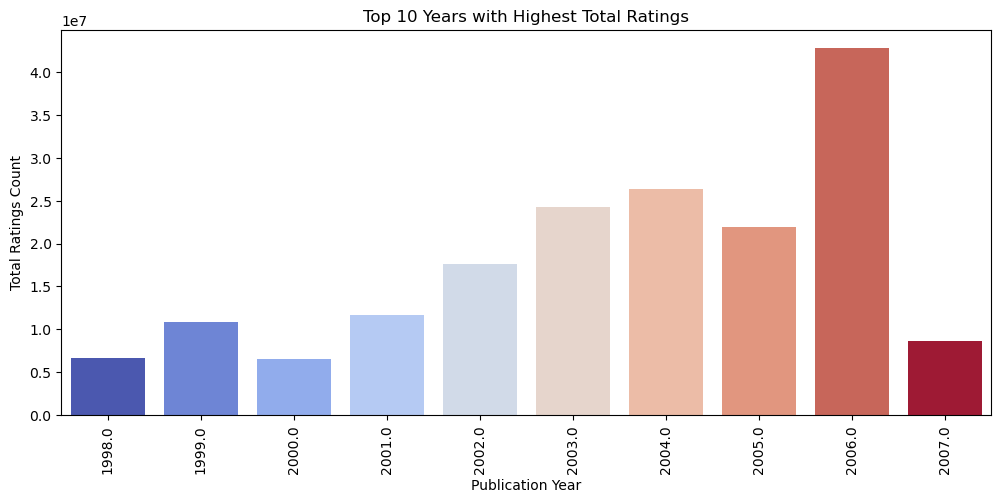

In [117]:
# Find the top 10 years with the highest total ratings
top_popular_years = popularity_trends.nlargest(10, 'total_ratings')

# Visualize the most popular years
plt.figure(figsize=(12, 5))
sns.barplot(x=top_popular_years['publication_year'], y=top_popular_years['total_ratings'],
            hue=top_popular_years['publication_year'], palette="coolwarm",legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 Years with Highest Total Ratings")
plt.xlabel("Publication Year")
plt.ylabel("Total Ratings Count")
plt.show()


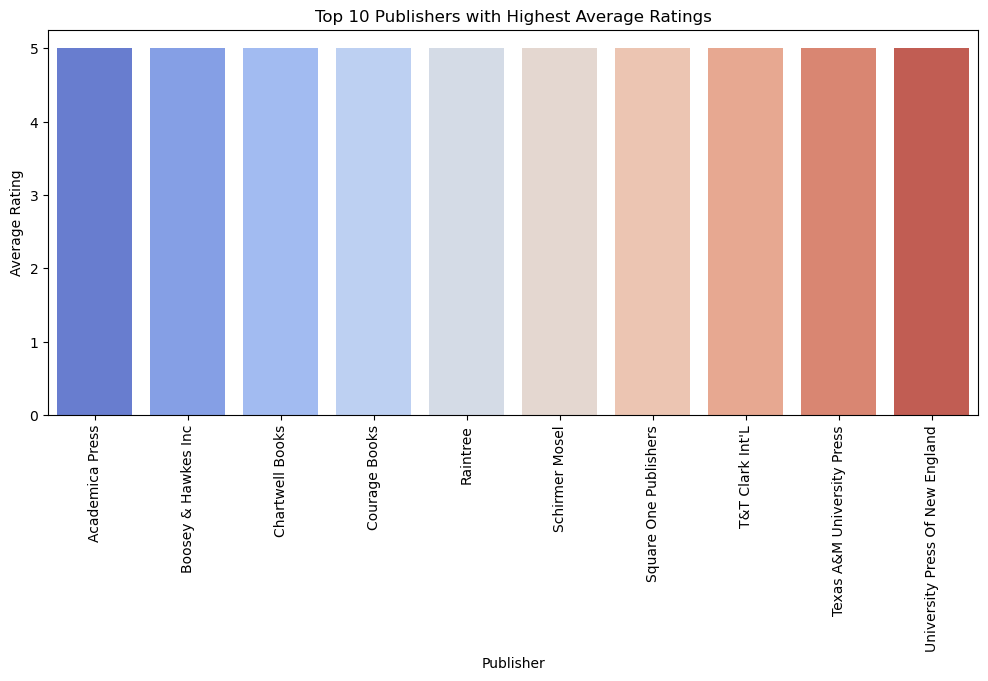

This helps identify which publishers consistently produce high-quality books


In [123]:
# Group by publisher and apply mean, count, and median
publisher_stats = df.groupby('publisher').agg({
    'average_rating': ['mean', 'median'],
    'ratings_count': ['sum', 'median', 'count']
}).reset_index()

# Rename columns
publisher_stats.columns = ['publisher', 'avg_rating', 'median_rating', 
                           'total_ratings', 'median_ratings', 'book_count']

# Find top 10 publishers with highest average ratings
top_publishers = publisher_stats.nlargest(10, 'avg_rating')

# Visualize top publishers
plt.figure(figsize=(12, 5))
sns.barplot(x=top_publishers['publisher'], y=top_publishers['avg_rating'],
            hue=top_publishers['publisher'],palette="coolwarm",legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 Publishers with Highest Average Ratings")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.show()

print("This helps identify which publishers consistently produce high-quality books")


In [125]:
df.to_csv("Eda_goodreads_books.csv", index=False)